# Outline
Goal: Predict 'Adj Close' as target with features as follows: 'Open', 'High', 'Low', 'Close' and 'Volume'

# Import libraries and data

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Unzip archive
!unzip -o archive.zip

Archive:  archive.zip
  inflating: Daily-DOGE-USD.csv      
  inflating: Weekly-DOGE-USD.csv     


In [3]:
# Load data
doge = pd.read_csv('Daily-DOGE-USD.csv')
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-24,0.001731,0.001845,0.001722,0.001816,0.001816,4.796720e+06
1,2017-08-25,0.001808,0.001830,0.001762,0.001790,0.001790,2.654040e+06
2,2017-08-26,0.001787,0.001797,0.001735,0.001778,0.001778,1.935350e+06
3,2017-08-27,0.001779,0.001784,0.001745,0.001760,0.001760,2.241620e+06
4,2017-08-28,0.001764,0.001825,0.001751,0.001825,0.001825,3.210440e+06
...,...,...,...,...,...,...,...
1457,2021-08-20,0.317571,0.333223,0.314142,0.327491,0.327491,3.512291e+09
1458,2021-08-21,0.327395,0.329356,0.315433,0.316797,0.316797,2.600397e+09
1459,2021-08-22,0.317085,0.321541,0.306546,0.314963,0.314963,2.237836e+09
1460,2021-08-23,0.314926,0.328094,0.313368,0.317914,0.317914,2.836629e+09


In [4]:
# Sorting DataFrame
doge.sort_values(by='Date', ascending=False, inplace=True)
doge.reset_index(drop=True, inplace=True)
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-24,0.317984,0.319460,0.311619,0.312391,0.312391,2.088121e+09
1,2021-08-23,0.314926,0.328094,0.313368,0.317914,0.317914,2.836629e+09
2,2021-08-22,0.317085,0.321541,0.306546,0.314963,0.314963,2.237836e+09
3,2021-08-21,0.327395,0.329356,0.315433,0.316797,0.316797,2.600397e+09
4,2021-08-20,0.317571,0.333223,0.314142,0.327491,0.327491,3.512291e+09
...,...,...,...,...,...,...,...
1457,2017-08-28,0.001764,0.001825,0.001751,0.001825,0.001825,3.210440e+06
1458,2017-08-27,0.001779,0.001784,0.001745,0.001760,0.001760,2.241620e+06
1459,2017-08-26,0.001787,0.001797,0.001735,0.001778,0.001778,1.935350e+06
1460,2017-08-25,0.001808,0.001830,0.001762,0.001790,0.001790,2.654040e+06


# Data Preprocessing

In [5]:
# Check whether 'doge' contains NaN.
doge.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [6]:
# Fill NaN with median values
doge.fillna(doge.median(), inplace=True)
doge.head()

/var/folders/rl/qrb5zxv57qg8121z8dhpdklh0000gn/T/ipykernel_3142/743861542.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-24,0.317984,0.319460,0.311619,0.312391,0.312391,2.088121e+09
1,2021-08-23,0.314926,0.328094,0.313368,0.317914,0.317914,2.836629e+09
2,2021-08-22,0.317085,0.321541,0.306546,0.314963,0.314963,2.237836e+09
3,2021-08-21,0.327395,0.329356,0.315433,0.316797,0.316797,2.600397e+09
4,2021-08-20,0.317571,0.333223,0.314142,0.327491,0.327491,3.512291e+09


In [7]:
# Normalization - MinMaxScaler
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for column in columns:
    scaler = MinMaxScaler()
    scaler = scaler.fit(doge[columns])
    doge[columns] = scaler.transform(doge[columns])

In [8]:
# Preprocessed DataFrame
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-24,0.461723,0.432524,0.511887,0.455594,0.312391,0.030069
1,2021-08-23,0.457272,0.444243,0.514766,0.463668,0.317914,0.040853
2,2021-08-22,0.460415,0.435349,0.503537,0.459354,0.314963,0.032226
3,2021-08-21,0.475421,0.445956,0.518165,0.462035,0.316797,0.037449
4,2021-08-20,0.461122,0.451204,0.516040,0.477669,0.327491,0.050587
...,...,...,...,...,...,...,...
1457,2017-08-28,0.001458,0.001414,0.001852,0.001564,0.001825,0.000031
1458,2017-08-27,0.001480,0.001359,0.001842,0.001469,0.001760,0.000017
1459,2017-08-26,0.001492,0.001376,0.001825,0.001496,0.001778,0.000012
1460,2017-08-25,0.001522,0.001421,0.001870,0.001513,0.001790,0.000023


# Create Datasets

In [9]:
# Utility Function
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [10]:
# Set feature, label dataset
train_feature = doge[['Open', 'High', 'Low', 'Close', 'Volume']]
train_label = doge['Adj Close']

In [11]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 10)

In [12]:
# Set X, y
X = train_feature
y = train_label

In [13]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=11)

# Modeling

In [14]:
model = Sequential()
model.add(SimpleRNN(20, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-08-25 09:11:21.781901: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-25 09:11:21.782111: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                520       
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [17]:
history = model.fit(X_train, y_train, batch_size=80, epochs=100, validation_data=(X_val, y_val))

2021-08-25 09:11:29.417965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-25 09:11:29.418485: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
 1/12 [=>............................] - ETA: 5s - loss: 0.0051 - mse: 0.0051

2021-08-25 09:11:29.725692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 57ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 6.1093e-04 - val_mse: 6.1093e-04
Epoch 2/100
 3/12 [======>.......................] - ETA: 0s - loss: 3.8659e-04 - mse: 3.8659e-04

2021-08-25 09:11:30.461682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 47ms/step - loss: 3.1033e-04 - mse: 3.1033e-04 - val_loss: 2.7316e-04 - val_mse: 2.7316e-04
Epoch 3/100
12/12 [==============================] - 1s 45ms/step - loss: 2.2712e-04 - mse: 2.2712e-04 - val_loss: 1.8232e-04 - val_mse: 1.8232e-04
Epoch 4/100
12/12 [==============================] - 1s 45ms/step - loss: 1.4223e-04 - mse: 1.4223e-04 - val_loss: 1.3288e-04 - val_mse: 1.3288e-04
Epoch 5/100
12/12 [==============================] - 1s 46ms/step - loss: 1.2124e-04 - mse: 1.2124e-04 - val_loss: 1.0989e-04 - val_mse: 1.0989e-04
Epoch 6/100
12/12 [==============================] - 1s 45ms/step - loss: 1.0114e-04 - mse: 1.0114e-04 - val_loss: 9.5713e-05 - val_mse: 9.5713e-05
Epoch 7/100
12/12 [==============================] - 1s 45ms/step - loss: 9.1407e-05 - mse: 9.1407e-05 - val_loss: 8.2909e-05 - val_mse: 8.2909e-05
Epoch 8/100
12/12 [==============================] - 1s 46ms/step - loss: 8.1293e-05 - mse: 8.1293e-05 - val_loss: 7.5956e-0

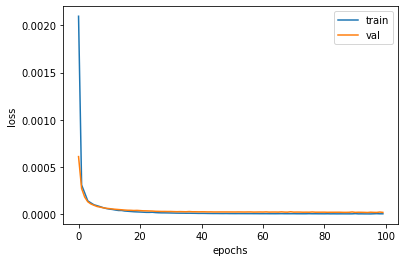

In [18]:
# Plot epochs - loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# Evaluate model
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train RMSE: {train_rmse.round(2)}")
print(f"Test RMSE: {test_rmse.round(2)}")

2021-08-25 09:12:30.781289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Train RMSE: 0.0
Test RMSE: 0.0


2021-08-25 09:12:31.075082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [20]:
# Prediction Plot
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=y_test.ravel(),
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=np.arange(len(y_test)), y=test_pred.ravel(),
                    line=dict(dash='dash', width=3),
                    name='pred'))

fig.update_layout(
    title="Adj Close Prediction of DogeCoin",
    height=500)
fig.show()

# To be continued
**What needs to be improved**
1. Drop outliers in order to predict more precisely.
2. Applying various algorithms: LSTM, GRU.
3. Make comparison with three other algorithms.